# Part3: NEW YORK REAL ESTATE DATA ANALYTICS

In [1]:
#Importing necessary libraries 
import requests
from bs4 import BeautifulSoup
import csv

final_list = [] #Creating an empty list

html_tags = {
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-US,en;q=0.9',
        'cache-control': 'no-cache',
        'cookie': 'zguid=23|%2403435e76-0699-4a32-b86d-77d033c907ef; _ga=GA1.2.1271511001.1575011821; zjs_user_id=null; zjs_anonymous_id=%2203435e76-0699-4a32-b86d-77d033c907ef%22; _gcl_au=1.1.1333357279.1575011822; _pxvid=3cfcc163-1278-11ea-bff8-0242ac12000b; ki_r=; __gads=ID=84d8013cfac6df96:T=1575012041:S=ALNI_MaSvVNZsir2JXJ17pv54bjsPuyfcw; ki_s=199442%3A0.0.0.0.0%3B199444%3A0.0.0.0.2; zgsession=1|c0999376-b167-4a47-a1cd-0e456d882d4e; _gid=GA1.2.55965867.1578668946; JSESSIONID=87D0662A6BC141A73F0D12620788519C; KruxPixel=true; DoubleClickSession=true; KruxAddition=true; ki_t=1575011869563%3B1578669044158%3B1578669044158%3B2%3B10; _pxff_tm=1; _px3=2e6809e35ce7e076934ff998c2bdb8140e8b793b53e08a27c5da11f1b4760755:DFItCmrETuS2OQcztcFmt0FYPUn00ihAAue2ynQgbfSq6H+p2yP3Rl3aeyls3Unr1VRJSgcNue8Rr1SUq4P1jA==:1000:9ueZvAJ6v5y4ny7psGF25dK+d3GlytY2Bh+Xj9UUhC4DaioIZ+FMXPU0mOX+Qnghqut0jIT61gLecN4fyu6qXaPDlBX6YsZVbIry1YyBN/37l0Ri3JP+E0h+m+QEBB+bqb6MbE2HtgGBJRJAry8dgOKGM5JtBGdX+X/nuQX1xaw=; AWSALB=E6JYC43gXQRlE2jPT9e2vAQOYPvdHnccBlqi0mcXevYExTaHro0M+uo/Qxahi6JyLz9LpotY9eLtEbYrAOeQXcCm6UhjWnTopQHernmjlR/ibE6JmE8F6tReiBn4; search=6|1581261153229%7Crect%3D40.96202658306895%252C-73.55498286718745%252C40.4487909557045%252C-74.40093013281245%26rid%3D6181%26disp%3Dmap%26mdm%3Dauto%26p%3D3%26z%3D0%26lt%3Dfsbo%26pt%3Dpmf%252Cpf%26fs%3D1%26fr%3D0%26mmm%3D1%26rs%3D0%26ah%3D0%26singlestory%3D0%26housing-connector%3D0%26abo%3D0%26garage%3D0%26pool%3D0%26ac%3D0%26waterfront%3D0%26finished%3D0%26unfinished%3D0%26cityview%3D0%26mountainview%3D0%26parkview%3D0%26waterview%3D0%26hoadata%3D1%26zillow-owned%3D0%09%01%096181%09%09%09%090%09US_%09',
        'pragma': 'no-cache',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/75.0.3770.142 Chrome/75.0.3770.142 Safari/537.36'
    } #Creating headers 

def to_csv(): #A function to store the data into a csv file
    with open('NYRealEstate.csv', 'w') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames = final_list[0].keys())
        writer.writeheader()
            
        for row in final_list:
             writer.writerow(row)
                
def parse(html):
        content = BeautifulSoup(html, 'lxml') 
        cards = content.findAll('article', {'class': 'list-card'})
        
        for card in cards: 
            try: #Will get the details of bathroom.
                ba = card.find('ul', {'class': 'list-card-details'}).findAll('li')[1].text.split(' ')[0]
            except:
                ba = 'N/A'
            
            try: #will get the details of sqft area of the property.
                sqft = card.find('ul', {'class': 'list-card-details'}).findAll('li')[2].text.split(' ')[0]
            except:
                sqft = 'N/A'
            
            try:
                image = card.find('img')['src']
            except:
                image = 'N/A'

            final_list.append({ #The values scraped and cleaned will be appended to their respective columns.
                'price': card.find('div', {'class': 'list-card-price'}).text,
                'address': card.find('address', {'class': 'list-card-addr'}).text,
                'bds': card.find('ul', {'class': 'list-card-details'}).findAll('li')[0].text.split(' ')[0],
                'ba': ba,
                'sqft': sqft,
                'image': image
            })
            
def fetch(url, params):
        print('HTTP GET request to URL: %s' % url, end='')
        res = requests.get(url, params=params, headers=html_tags) #Will scrape the data 
        print(' | Status code: %s' % res.status_code) #to print the status code of scraping 
        
        return res
    
def run(): #A function which will the run the query to get the data from the website.
        for page in range(1, 5):
            params = {
                'searchQueryState': '{"pagination":{"currentPage":%s},"mapBounds":{"west":-74.40093013281245,"east":-73.55498286718745,"south":40.4487909557045,"north":40.96202658306895},"regionSelection":[{"regionId":6181,"regionType":6}],"isMapVisible":false,"filterState":{"isForSaleByAgent":{"value":false},"isNewConstruction":{"value":false},"isForSaleForeclosure":{"value":false},"isComingSoon":{"value":false},"isAuction":{"value":false}},"isListVisible":true}' % page
            } #The parameters which will b used to fetch the data from the website.
            
            res = fetch('https://www.zillow.com/new-york-ny/fsbo/2_p/', params) #Will fetch the data and store it in a variable.
            parse(res.text) #The variable is passed into another funtion for parsing the data i.e. processing what've been fetched.
        
        to_csv() #After the for is executed, this function will be called to store data into a csv file.
        
run()#Calling the main function to scrape data from the real estate website.

#Reference : https://github.com/maksimKorzh/one-time-scrapers/blob/master/scrapers/zillow/zillow_scraper.py

HTTP GET request to URL: https://www.zillow.com/new-york-ny/fsbo/2_p/ | Status code: 200
HTTP GET request to URL: https://www.zillow.com/new-york-ny/fsbo/2_p/ | Status code: 200
HTTP GET request to URL: https://www.zillow.com/new-york-ny/fsbo/2_p/ | Status code: 200
HTTP GET request to URL: https://www.zillow.com/new-york-ny/fsbo/2_p/ | Status code: 200


In [2]:
#Importing important libraries for analysis and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
#Importing the scraped dataset 
data = pd.read_csv('NYRealEstate.csv')

In [4]:
data

,price,address,bds,ba,sqft,image
0,"$599,900","13449 161st St, Jamaica, NY 11434",3,3,"1,280",https://photos.zillowstatic.com/fp/27c8725d4d8...
1,"$599,000","35 Ludlow St, Staten Island, NY 10312",3,2,"1,512",https://photos.zillowstatic.com/fp/dc2c671ecfc...
2,"$499,000","193 E 37th St #B, Brooklyn, NY 11203",4,2,"1,824",NaN
3,"$680,000","161 E 31st St, Brooklyn, NY 11226",7,3,"2,184",https://photos.zillowstatic.com/fp/543f7c1248e...
4,"$100,000","45 Tudor City Pl, New York, NY 10017",--,--,--,NaN
...,...,...,...,...,...,...
155,"$160,000","17 Sunnymeade Vlg, Staten Island, NY 10305","2,132",NaN,NaN,NaN
156,"$689,000","22 Rome Ave, Staten Island, NY 10304",3,3,"1,350","data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
157,"$2,750,000","1435 Lexington Ave APT 11E, New York, NY 10128",3,3,"116,270",NaN
158,"$1,538,000","33-51 157th St, Flushing, NY 11354",4,3,"2,750","data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."


# Data Preprocessing

In [ ]:
#Steps to prepare :
#1. Remove the column images as it has no significance for our data.
#2. Split the address as per city, state, zip code and remove the extra column.
#3. Remove special characters from numeral columns. 
#4. Check data types of columns and change the required ones to integers and float.
#5. Visualise the columns to check the null values and deal with them accordingly.
#6. Explore the columns bds, ba, city, state along with the help of seaborn visualisation to identify the odd value and update them as per the dataset needs.

In [5]:
data = data.iloc[ : , : -1]

In [6]:
data 
#BDS - Bedroom, Dining, Spatious, BA - Bathroom

,price,address,bds,ba,sqft
0,"$599,900","13449 161st St, Jamaica, NY 11434",3,3,"1,280"
1,"$599,000","35 Ludlow St, Staten Island, NY 10312",3,2,"1,512"
2,"$499,000","193 E 37th St #B, Brooklyn, NY 11203",4,2,"1,824"
3,"$680,000","161 E 31st St, Brooklyn, NY 11226",7,3,"2,184"
4,"$100,000","45 Tudor City Pl, New York, NY 10017",--,--,--
...,...,...,...,...,...
155,"$160,000","17 Sunnymeade Vlg, Staten Island, NY 10305","2,132",NaN,NaN
156,"$689,000","22 Rome Ave, Staten Island, NY 10304",3,3,"1,350"
157,"$2,750,000","1435 Lexington Ave APT 11E, New York, NY 10128",3,3,"116,270"
158,"$1,538,000","33-51 157th St, Flushing, NY 11354",4,3,"2,750"


In [7]:
data['address']

0                   13449 161st St, Jamaica, NY 11434
1               35 Ludlow St, Staten Island, NY 10312
2                193 E 37th St #B, Brooklyn, NY 11203
3                   161 E 31st St, Brooklyn, NY 11226
4                45 Tudor City Pl, New York, NY 10017
                            ...                      
155        17 Sunnymeade Vlg, Staten Island, NY 10305
156              22 Rome Ave, Staten Island, NY 10304
157    1435 Lexington Ave APT 11E, New York, NY 10128
158                33-51 157th St, Flushing, NY 11354
159                562 Hendrix St, Brooklyn, NY 11207
Name: address, Length: 160, dtype: object

In [8]:
#Splitting the address

spl = data['address'].str.split(', ', 1, expand=True)
data['Street'] = spl[0]
spl1 = spl[1].str.split(', ', 1, expand=True)
data['City'] = spl1[0]
data['State'] = spl1[1]

In [9]:
#Splits and enters the values in a new column for State and Zip of address
spl2 = data['State'].str.split()
data[['State','Zip']] = pd.DataFrame(spl2.tolist(), index= data.index) 

In [10]:
#Removes the initial address column as it has no significance now
data.drop('address', axis=1, inplace=True)

In [11]:
data

,price,bds,ba,sqft,Street,City,State,Zip
0,"$599,900",3,3,"1,280",13449 161st St,Jamaica,NY,11434
1,"$599,000",3,2,"1,512",35 Ludlow St,Staten Island,NY,10312
2,"$499,000",4,2,"1,824",193 E 37th St #B,Brooklyn,NY,11203
3,"$680,000",7,3,"2,184",161 E 31st St,Brooklyn,NY,11226
4,"$100,000",--,--,--,45 Tudor City Pl,New York,NY,10017
...,...,...,...,...,...,...,...,...
155,"$160,000","2,132",NaN,NaN,17 Sunnymeade Vlg,Staten Island,NY,10305
156,"$689,000",3,3,"1,350",22 Rome Ave,Staten Island,NY,10304
157,"$2,750,000",3,3,"116,270",1435 Lexington Ave APT 11E,New York,NY,10128
158,"$1,538,000",4,3,"2,750",33-51 157th St,Flushing,NY,11354


In [12]:
#The column Street doesn't help much so dropping the column Street
data.drop('Street', axis=1, inplace=True)

In [13]:
data

,price,bds,ba,sqft,City,State,Zip
0,"$599,900",3,3,"1,280",Jamaica,NY,11434
1,"$599,000",3,2,"1,512",Staten Island,NY,10312
2,"$499,000",4,2,"1,824",Brooklyn,NY,11203
3,"$680,000",7,3,"2,184",Brooklyn,NY,11226
4,"$100,000",--,--,--,New York,NY,10017
...,...,...,...,...,...,...,...
155,"$160,000","2,132",NaN,NaN,Staten Island,NY,10305
156,"$689,000",3,3,"1,350",Staten Island,NY,10304
157,"$2,750,000",3,3,"116,270",New York,NY,10128
158,"$1,538,000",4,3,"2,750",Flushing,NY,11354


In [15]:
#Removing Special Characters from Price and SQFT Columns and storing them in a different column
data['Sqft'] = data['sqft'].str.replace('\W', '')
data['Price'] = data['price'].str.replace('\W', '')

In [16]:
#Removing the initial price and sqft columns and keeping the updated ones
data.drop('price', axis=1, inplace=True)
data.drop('sqft', axis=1, inplace=True)

In [17]:
data

,bds,ba,City,State,Zip,Sqft,Price
0,3,3,Jamaica,NY,11434,1280,599900
1,3,2,Staten Island,NY,10312,1512,599000
2,4,2,Brooklyn,NY,11203,1824,499000
3,7,3,Brooklyn,NY,11226,2184,680000
4,--,--,New York,NY,10017,,100000
...,...,...,...,...,...,...,...
155,"2,132",NaN,Staten Island,NY,10305,NaN,160000
156,3,3,Staten Island,NY,10304,1350,689000
157,3,3,New York,NY,10128,116270,2750000
158,4,3,Flushing,NY,11354,2750,1538000


In [18]:
#Converting the numerical objects into integers 
data.dtypes

bds      object
ba       object
City     object
State    object
Zip      object
Sqft     object
Price    object
dtype: object

In [19]:
#Zip, sqft, price data type is converted to int from object
data['Zip'] = pd.to_numeric(data['Zip'])
data['Sqft'] = pd.to_numeric(data['Sqft'])
data['Price'] = pd.to_numeric(data['Price'])

In [21]:
data.dtypes

bds       object
ba        object
City      object
State     object
Zip        int64
Sqft     float64
Price      int64
dtype: object

In [22]:
#Printing information about a column like dtype, non-null values, memory usage etc.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
bds      160 non-null object
ba       159 non-null object
City     160 non-null object
State    160 non-null object
Zip      160 non-null int64
Sqft     150 non-null float64
Price    160 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.9+ KB


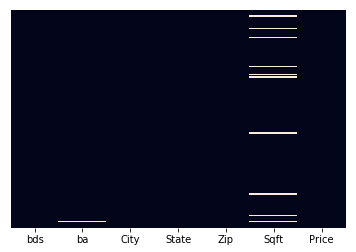

In [23]:
#Visualizing using heatmap to find null values in the columns
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [24]:
#The above plot shows and the data.info shows that there are 1 null values in each ba and sqft features

In [25]:
#Handling the null values

In [26]:
#Dropping null values as there is only one null value in column ba and
#there is no method to adjust the values of sqft as it can result in false results of some properties prices so dropping them too.
data.dropna(inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 159
Data columns (total 7 columns):
bds      150 non-null object
ba       150 non-null object
City     150 non-null object
State    150 non-null object
Zip      150 non-null int64
Sqft     150 non-null float64
Price    150 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 9.4+ KB


In [28]:
data

,bds,ba,City,State,Zip,Sqft,Price
0,3,3,Jamaica,NY,11434,1280.0,599900
1,3,2,Staten Island,NY,10312,1512.0,599000
2,4,2,Brooklyn,NY,11203,1824.0,499000
3,7,3,Brooklyn,NY,11226,2184.0,680000
5,4,1,Yonkers,NY,10705,1945.0,288000
...,...,...,...,...,...,...,...
154,5,3,Brooklyn,NY,11215,2619.0,3900000
156,3,3,Staten Island,NY,10304,1350.0,689000
157,3,3,New York,NY,10128,116270.0,2750000
158,4,3,Flushing,NY,11354,2750.0,1538000


In [29]:
#Converting column BA to numeric from object
data['ba'] = pd.to_numeric(data['ba'])

In [66]:
data['ba'] = data['ba'].apply(np.int64)

In [67]:
data.dtypes

bds       object
ba         int64
City      object
State     object
Zip        int64
Sqft     float64
Price      int64
dtype: object

In [32]:
#BDS Column cannot be converted to an integer column as there are Studio appartments too in the dataset

In [33]:
#Function to increase the size of plots
def big():
    plt.figure(figsize=(15,8))

In [34]:
#Now, exploring each column and making changes as required for some values.

In [35]:
#Checking the unique values in the column bds
data['bds'].unique()

array(['3', '4', '7', '1', '2', '6', '5', '8', 'Studio', '--'],
      dtype=object)

In [82]:
#Removing the unnecessary value from the dataset
y = data[data['bds'] == '--']
data.drop(y.index, inplace=True)

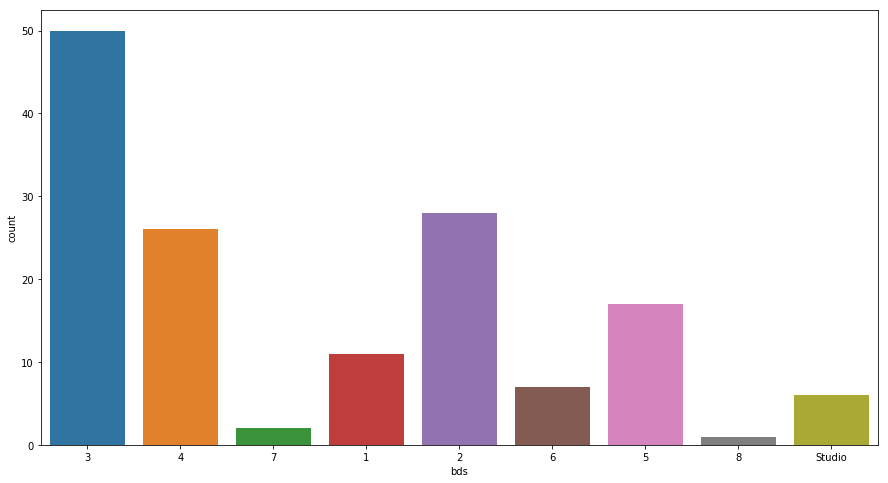

In [83]:
#Visualising the unique values in the column bds with the helo of seaborn countplot which plots the unique values as per their frequencies in the dataset.
big()
sns.countplot(x='bds', data=data)

In [ ]:
#The above plot implies that the number of flats with 3 bedrooms are the most and least with 8 bedrooms.

In [191]:
#Checking the unique values in the column ba
data['ba'].unique()

array([3, 2, 1, 5, 4])

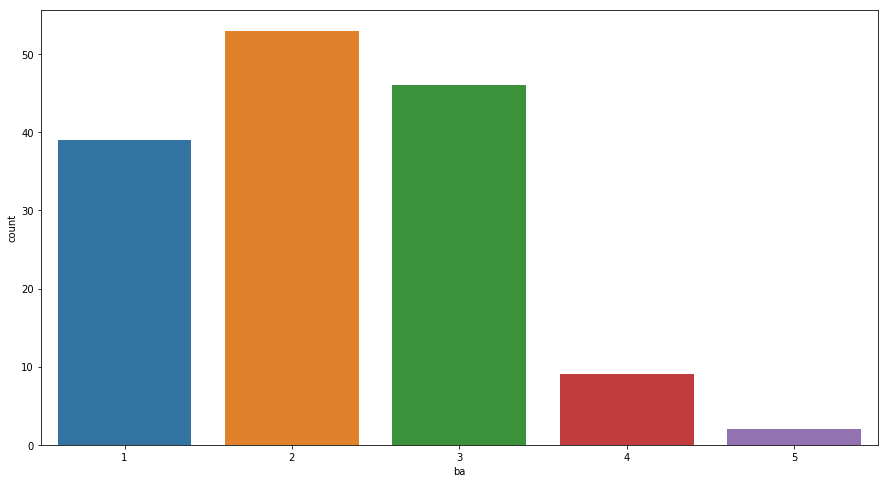

In [70]:
#Visualising the unique values in the column ba with the help of seaborn countplot
big()
sns.countplot(x='ba', data=data)

In [ ]:
#The above plot implies that the number of flats with 2 bathrooms are the most and least with 5 bathrooms

In [84]:
#Checking the unique values in the column City
data['City'].unique()

array(['Jamaica', 'Staten Island', 'Brooklyn', 'Yonkers', 'New York',
       'Briarwood', 'Glendale', 'South Ozone Park', 'Bronx', 'Flushing',
       'Rego Park', 'Broad Channel', 'Bayside', 'Astoria', 'Saint Albans',
       'Fresh Meadows', 'Bellerose Manor', 'Rockaway Park',
       'Far Rockaway', 'Queens', 'Howard Beach', 'Belle Harbor',
       'Middle Village', 'Corona', 'Forest Hills', 'Long Island City',
       'Woodhaven'], dtype=object)

[Text(0, 0, 'Jamaica'),
 Text(0, 0, 'Staten Island'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Yonkers'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'Briarwood'),
 Text(0, 0, 'Glendale'),
 Text(0, 0, 'South Ozone Park'),
 Text(0, 0, 'Bronx'),
 Text(0, 0, 'Flushing'),
 Text(0, 0, 'Rego Park'),
 Text(0, 0, 'Broad Channel'),
 Text(0, 0, 'Bayside'),
 Text(0, 0, 'Astoria'),
 Text(0, 0, 'Saint Albans'),
 Text(0, 0, 'Fresh Meadows'),
 Text(0, 0, 'Bellerose Manor'),
 Text(0, 0, 'Rockaway Park'),
 Text(0, 0, 'Far Rockaway'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Howard Beach'),
 Text(0, 0, 'Belle Harbor'),
 Text(0, 0, 'Middle Village'),
 Text(0, 0, 'Corona'),
 Text(0, 0, 'Forest Hills'),
 Text(0, 0, 'Long Island City'),
 Text(0, 0, 'Woodhaven')]

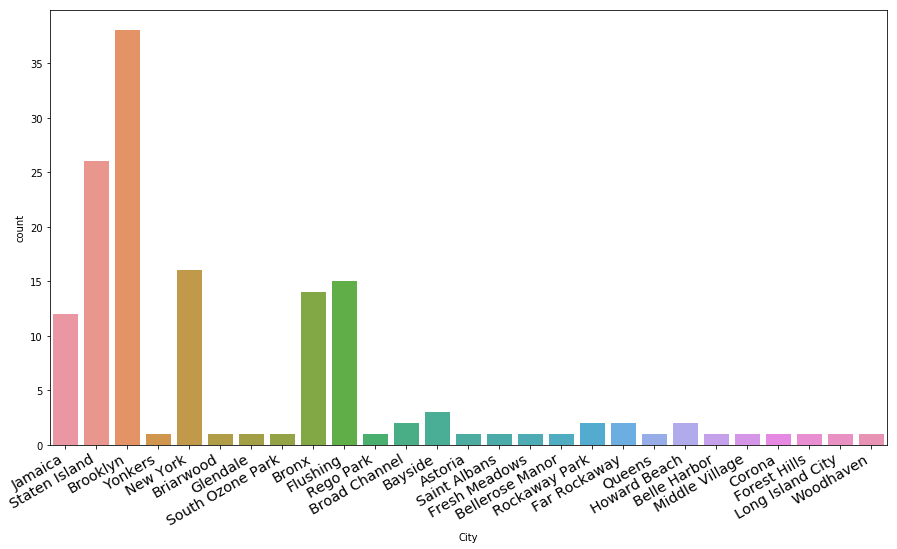

In [85]:
#Visualising the unique values in the column city with the help of seaborn countplot 
big()
plot = sns.countplot(x='City', data=data)
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right', fontweight='light',
    fontsize='x-large')

In [ ]:
#The above plot implies that Brooklyn has the most number of flats that are on sale.
#And, the cities with the least number of flats are Yonkers, Briarwood, Glendale, South Ozone Park,
#Rego Park, Astoria, Saint Albans, Fresh Meadows, Bellerose Manor, Queens, Belle Harbor, Middle Village, 
#Corona, Forest Hills, Long Island City, Woodhaven

In [49]:
#There is one property which is not present in NY and instead in CT which has no use as the dataset is based on the properties in the New York state of the USA.
data[data['State'] == 'CT']

,bds,ba,City,State,Zip,Sqft,Price
66,4,2.0,Voluntown,CT,6384,1550.0,595000


In [55]:
#Removing the error value in the State column
x = data[data['State'] == 'CT']
data.drop(x.index, inplace=True)

In [56]:
data['State'].value_counts()

NY    149
Name: State, dtype: int64

In [87]:
#Unique values in Zip column
data['Zip'].unique()

array([11434, 10312, 11203, 11226, 10705, 10017, 11435, 11228, 10002,
       10044, 10306, 11385, 11207, 10030, 11420, 10460, 10469, 10023,
       10065, 10314, 10466, 10307, 10305, 11367, 11360, 11234, 11201,
       11374, 10021, 11693, 11361, 11106, 11412, 11218, 11368, 10024,
       11231, 11229, 11365, 10309, 11208, 10025, 10301, 11238, 11377,
       11355, 11370, 11427, 10459, 10016, 11694, 11416, 11364, 11357,
       10010, 11204, 11691, 11362, 10011, 11215, 11210, 11417, 11414,
       11354, 11233, 11209, 11423, 11358, 10462, 10471, 11418, 11379,
       10467, 11373, 10310, 11214, 11375, 10304, 11422, 11223, 11230,
       10028, 10461, 11378, 10464, 11421, 10128])

In [88]:
#Unique values in Sqft column
data['Sqft'].unique()

array([  1280.,   1512.,   1824.,   2184.,   1945.,    550.,   1100.,
         3420.,  14425.,   2000.,    962.,   1314.,   3000.,    704.,
          900.,   1372.,    980.,   3200.,   2500.,   1507.,   1700.,
         1508.,    800.,   1008.,   3450.,   1374.,   1000.,   3187.,
         1120.,    750.,   3560.,   1584.,   1200.,   1400.,    500.,
         2100.,   1578.,    680.,    850.,   1300.,   2300.,   1250.,
          904.,   2080.,   1232.,   2200.,   1349.,   4200.,   2308.,
         1777.,   1616.,   1086.,   2122.,   1665.,   2381.,   2012.,
          821.,    571.,   1550.,    600.,   1720.,   2064.,    700.,
          350.,   1233.,   1968.,   2604.,   5500.,   3300.,   1317.,
         1045.,   2564.,    810.,   1248.,   1287.,   2400.,   1800.,
         2995.,    650.,   3500.,   2150.,   2144.,   2190.,   2786.,
          950.,   1960.,   1889.,   2104.,    940.,   1530.,   2328.,
         2196.,    991.,   1440.,    915.,   1239.,   1500.,   2649.,
         1690.,    4

In [89]:
#Number of rows and columns in the data set after the clensing of dataset
data.shape #The result is interpreted as (Rows, Columns)

(148, 7)

# Exploratory Data Analysis

In [90]:
#First five values of the dataset
data.head()

,bds,ba,City,State,Zip,Sqft,Price
0,3,3,Jamaica,NY,11434,1280.0,599900
1,3,2,Staten Island,NY,10312,1512.0,599000
2,4,2,Brooklyn,NY,11203,1824.0,499000
3,7,3,Brooklyn,NY,11226,2184.0,680000
5,4,1,Yonkers,NY,10705,1945.0,288000


In [91]:
#Last five values of the dataset
data.tail()

,bds,ba,City,State,Zip,Sqft,Price
154,5,3,Brooklyn,NY,11215,2619.0,3900000
156,3,3,Staten Island,NY,10304,1350.0,689000
157,3,3,New York,NY,10128,116270.0,2750000
158,4,3,Flushing,NY,11354,2750.0,1538000
159,5,3,Brooklyn,NY,11207,1134.0,599000


In [93]:
#Calculating basic statistical data like mean, standard deviation, minimum value, maximum value of every integral column.
data.describe()

,ba,Zip,Sqft,Price
count,148.000000,148.000000,148.000000,1.480000e+02
mean,2.216216,10930.445946,2517.317568,8.631850e+05
std,0.944303,542.166921,9510.495245,7.370552e+05
min,1.000000,10002.000000,300.000000,1.300000e+04
25%,1.000000,10312.000000,1029.000000,4.899750e+05
50%,2.000000,11218.000000,1507.500000,6.645000e+05
75%,3.000000,11367.250000,2158.500000,9.085000e+05
max,5.000000,11694.000000,116270.000000,5.400000e+06


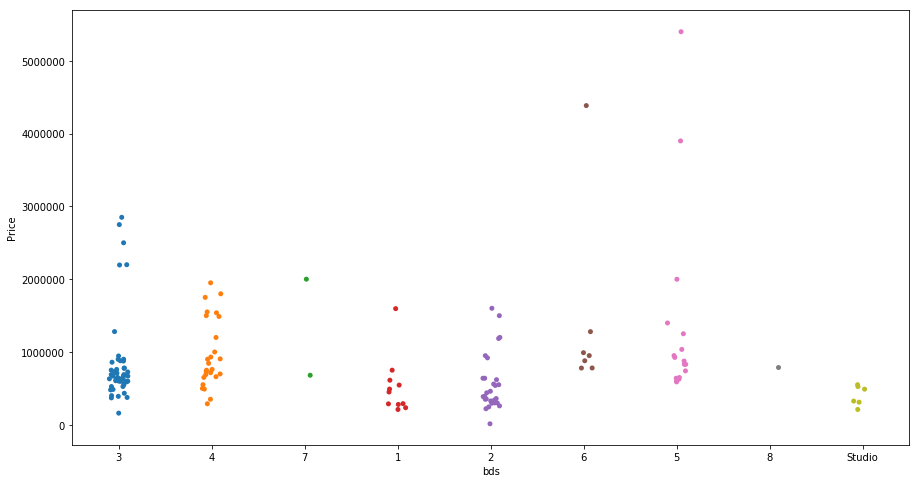

In [98]:
#A plot of Price vs Bedrooms (bds)
big()
sns.stripplot(x='bds', y='Price', data=data)

In [ ]:
#The above plot helps to analyse the maximum number of bedrooms in a particular price range.
#Maximum properties with bedrooms 3,4,1,2, and Studio had price range below $1,000,000.
#And the number of properties above $1,000,000 are very few depending on the number of bedrooms.

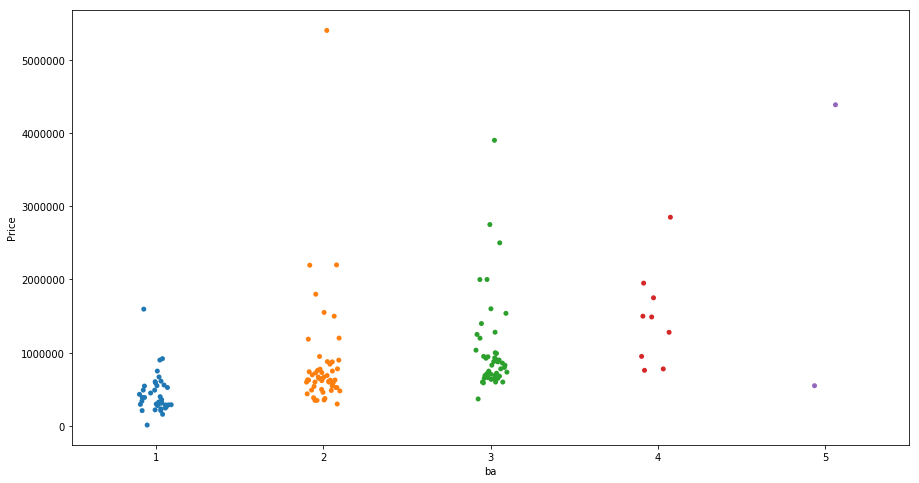

In [104]:
#A plot of Price vs Bathrooms(ba)
big()
sns.stripplot(x='ba', y='Price', data=data)

In [ ]:
#The above plot helps to analyse the maximum number of bathrooms in a particular price range.
#Maximum properties with bathrooms 1,2,3 had price range below $1,000,000.
#And the number of properties with bathrooms 1,2,3 respectively had price above $1,000,000 are very.
#The price range of properties with 4 bathroom startes approximately from $900,000 respectively.

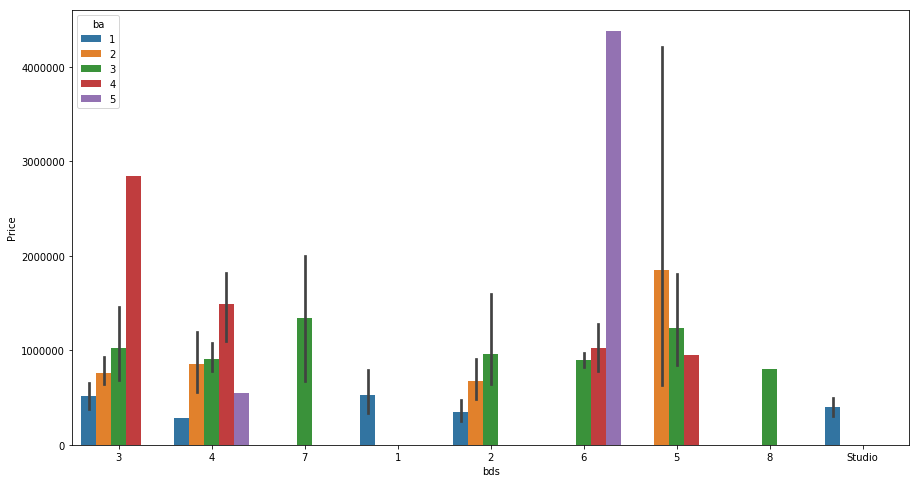

In [198]:
#Barplot of Price vs Bedrooms (bds) with respect to Bathrooms (ba)
big()
sns.barplot(x='bds', y='Price', data=data, hue='ba')

#The barplot helps to analyse the number of properties with a particular number of bedrooms in a price range with respect to the number of bathrooms available in the property.
#The properties with bedrooms 7,1,8, and Studios are available only with one type of bathroom. For example, all the properties with 7 bedrooms are available with 3 bathrooms only, there are no more or less number of bathrooms in different properties with 7 bedrooms.
#The properties with bedrooms 3,2,6,5 has a variety of bathroom range available and the price range is below $1,000,000.
#The property with 4 bedrooms has all the bathroom range availble in its price range.
#The whiskers in each bar of the barplot shows the exceptional price range in the particular bedroom property.

<Figure size 1080x576 with 0 Axes>

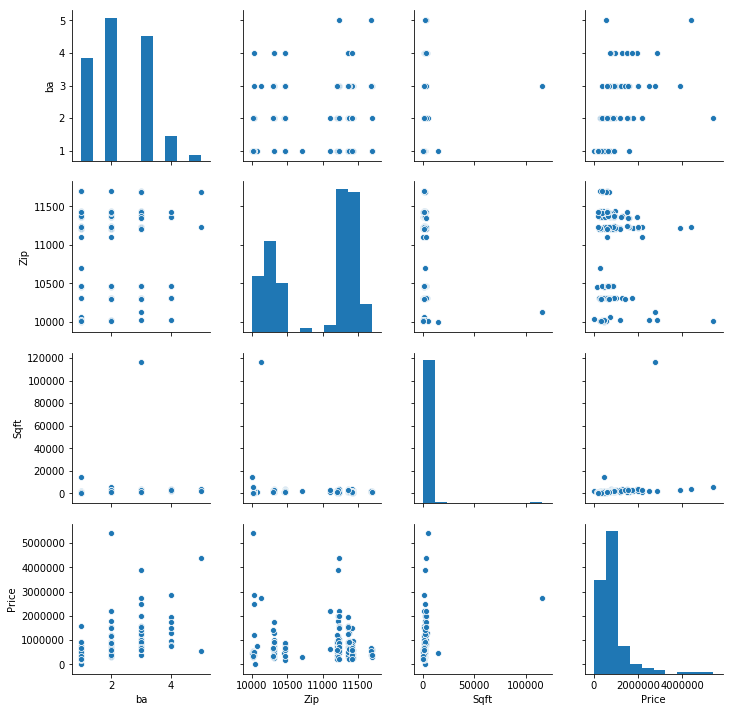

In [115]:
#Pairplot to find a distribution between a single variable and two variables
big()
sns.pairplot(data=data)

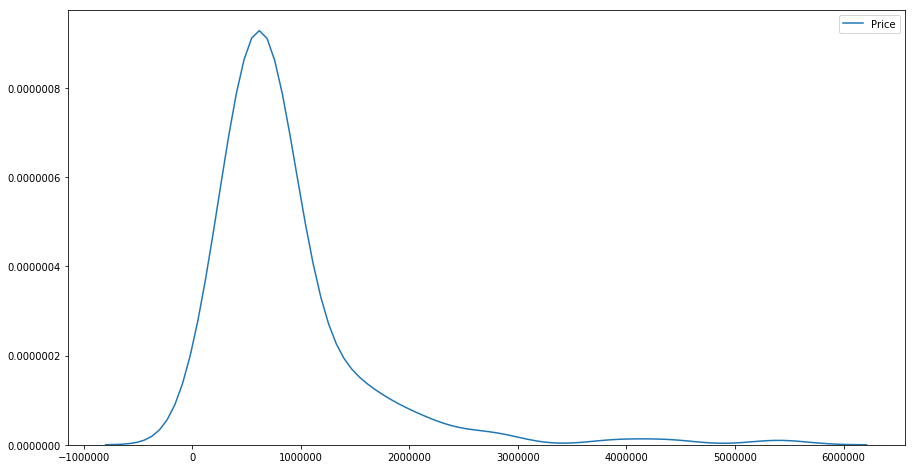

In [118]:
#Density plot for the column Price
big()
sns.kdeplot(data['Price'])

In [ ]:
#The above plot gave an insight about the price distribution for the properties across the state New York.
#The most number of properties have a price range between $500,000 to $11,000,000.
#The range of properties are second highest from $11,000,000 to $20,00,000.
#The most expensive properties are very limited in number which have a price approximately more than $25,00,000.

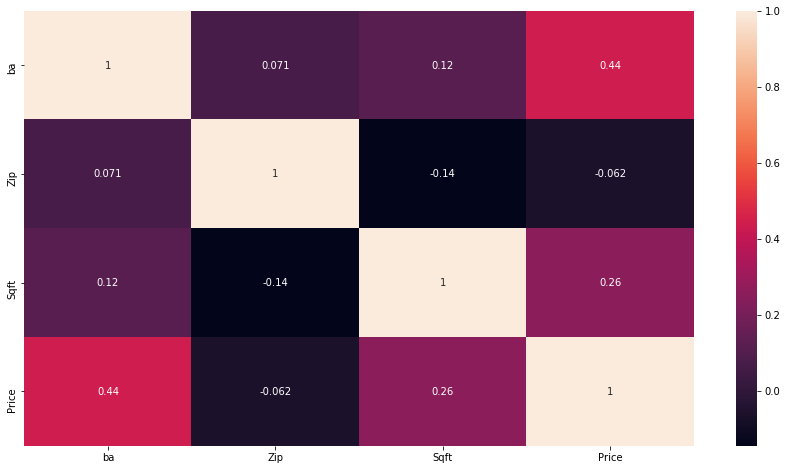

In [120]:
#Correlation between different features of the dataset using heatmap
big()
sns.heatmap(data.corr(), annot=True)

In [ ]:
#Heatmap is used to find the correlation between different columns of the dataset which can be further used to 
#derive a meaningful relationship between them by further visualisations.
#As per the plot, "Price and ba" and "Price and Sqft" are most related as per their values.
#There is no use of exploring "Sqft and Zip" and "Price and Zip" as the correlatinal values is in negative.

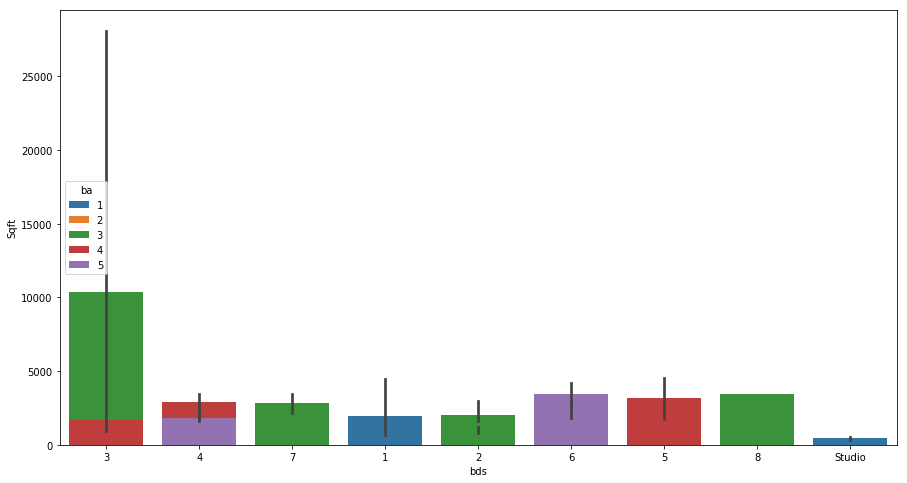

In [160]:
#Barplot of Square Feet (Sqft) vs Bedrooms (bds) with respect to Bathroom (ba)
big()
sns.barplot(x='bds', y='Sqft', data=data, hue='ba', dodge=False)

In [ ]:
#The above barplot helps to analyse the bathroom range available in a particular type of property (with respect to bedrooms) as per the sqft of the property.
#The property which have 1 bedroom are available only with 1 bathroom which is around 2500 sqft approx range.
#The studios available are only with 1 bathroom and are very small in area around 1000 sqft.
#It also shows that the majority of the properties are available under 5000 sqft.
#The property with 3 bedrooms has an exceptionally large area of more than 25000 sqft.

[Text(0, 0, 'Jamaica'),
 Text(0, 0, 'Staten Island'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, 'Yonkers'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'Briarwood'),
 Text(0, 0, 'Glendale'),
 Text(0, 0, 'South Ozone Park'),
 Text(0, 0, 'Bronx'),
 Text(0, 0, 'Flushing'),
 Text(0, 0, 'Rego Park'),
 Text(0, 0, 'Broad Channel'),
 Text(0, 0, 'Bayside'),
 Text(0, 0, 'Astoria'),
 Text(0, 0, 'Saint Albans'),
 Text(0, 0, 'Fresh Meadows'),
 Text(0, 0, 'Bellerose Manor'),
 Text(0, 0, 'Rockaway Park'),
 Text(0, 0, 'Far Rockaway'),
 Text(0, 0, 'Queens'),
 Text(0, 0, 'Howard Beach'),
 Text(0, 0, 'Belle Harbor'),
 Text(0, 0, 'Middle Village'),
 Text(0, 0, 'Corona'),
 Text(0, 0, 'Forest Hills'),
 Text(0, 0, 'Long Island City'),
 Text(0, 0, 'Woodhaven')]

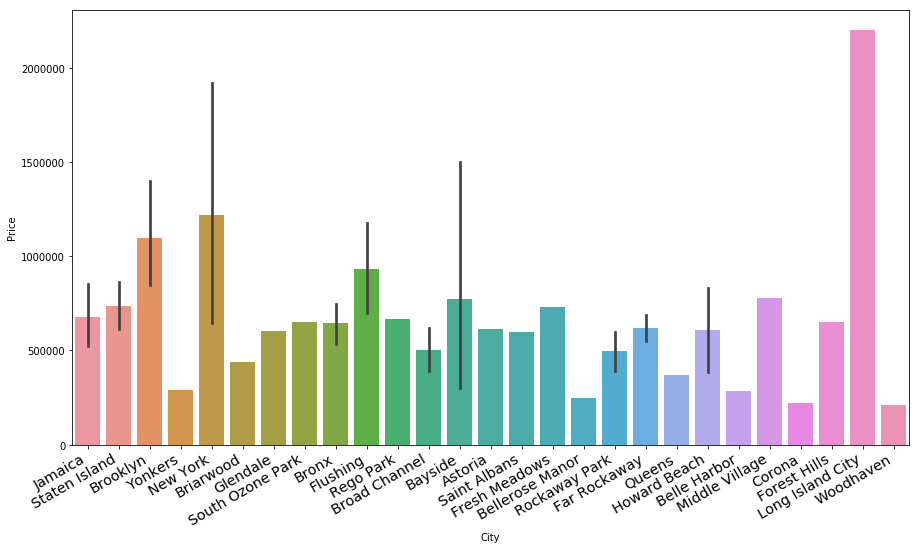

In [231]:
#Barplot between City and Price
big()
barp = sns.barplot(x='City', y='Price', data=data)
barp.set_xticklabels(barp.get_xticklabels(), rotation=30, horizontalalignment='right', fontweight='light',
    fontsize='x-large')

In [ ]:
#The above plot implies that the costliest property in the New York state is available in Long Island City that costs over $2,000,000.
#The cheapest properties a buyer can find are under $500,000 in Cities: Yonkers, Briarwood, Broad Channel, Bellerose Manor, Rockaway Park, Queens, Belle Harbor, Corona and in Woodhaven.
#Although there are a few exceptions in some cities where a few properties are more expensive as compared to the overall available properties in the particular city.
#For example in Brooklyn, New York, the average properties and the maximum range a buyer can find is around $11,000,000 but there are a two or three properties in both the cities which are around $15,000,000 respectively.
#Same case is for some properties in Bayside where the average and maximum range of properties is around $750,000 but in the same city there is a property which costs over $15,000,000 just twice the price of the common real estate properties in the city.

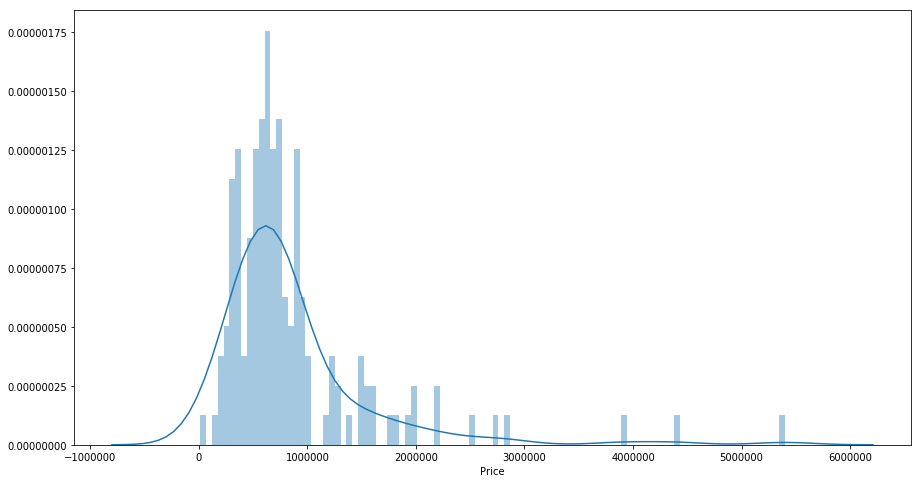

In [225]:
#Histogram of column Price
big()
sns.distplot(data['Price'], bins=100)

In [ ]:
#The above plot gave an insight about the price distribution for the properties across the state New York.
#The most number of properties have a price range between $500,000 to $11,000,000.
#The range of properties are second highest from $11,000,000 to $20,00,000.
#The most expensive properties are very limited in number which have a price approximately more than $25,00,000.

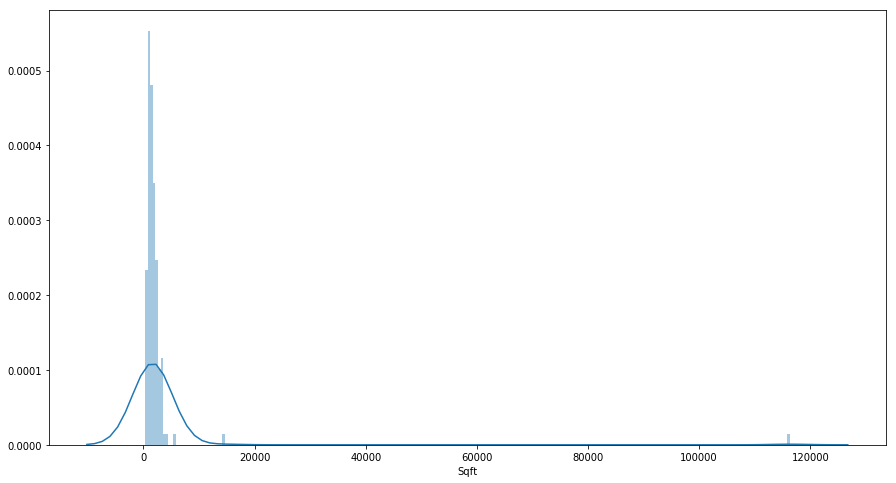

In [222]:
#Histogram for column Sqft
big()
sns.distplot(data['Sqft'], bins=250)

In [ ]:
#The above plot gave an insight about the sqft the properties available across the state New York.
#The majority of the properties are available under 5000 sqft area.
#There are a few expensive expeptional properties which have an area of more than 10,000 sqft.
#Coincidentally the plot resembles the tallest building in the world : Burj Khalifa.

In [ ]:
#The outcome of all the exploratory data analysis:
#The properties with a particular number of bedrooms and bathroom are available in what range was analysed as well as the squarefeet area the property is build in and how does it vary according to the number of bedrooms and bathrooms in a property. 
#For example. A customer wants to purchase a property in the New York State with 3 bedrooms and 3 bathrooms, so the ideal price the customer can expect is around $1,000,000 for 5000 sqft. 
#Here any real estate broker can offer the customer a better deal with more bedrooms and bathrooms available in the same price.

# Questions about the dataset

# Q1. Does the price range vary based on the squarefeet area of the property?

In [257]:
#The Sqft value at row 157 i.e. 116270 is creating disruoptions in the graph and is practically not possible. 
#So removing the value
sq = data[data['Sqft'] == 116270]
data.drop(sq.index, inplace=True)

In [262]:
#The Sqft value at row 9 i.e. 114425 is creating disruoptions in the graph and is practically not possible. 
#So removing the value
sq = data[data['Sqft'] == 14425]
data.drop(sq.index, inplace=True)

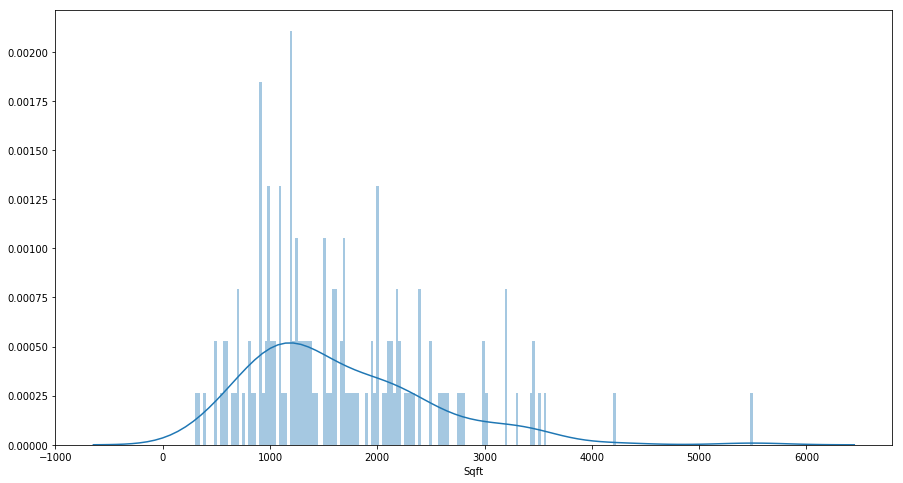

In [265]:
#Histogram for updated column Sqft
big()
sns.distplot(data['Sqft'], bins=200)

In [302]:
#To round off the values, For example any value between 1301-1400, 901-1000, the values will be round off to their floor values i.e. 1300, 900 respectively
import math
def round_sqft(x):
    return float(math.floor(x / 100.0)) * 100
data['Sqft_new'] = data['Sqft'].apply(round_sqft)

[Text(0, 0, '300.0'),
 Text(0, 0, '400.0'),
 Text(0, 0, '500.0'),
 Text(0, 0, '600.0'),
 Text(0, 0, '700.0'),
 Text(0, 0, '800.0'),
 Text(0, 0, '900.0'),
 Text(0, 0, '1000.0'),
 Text(0, 0, '1100.0'),
 Text(0, 0, '1200.0'),
 Text(0, 0, '1300.0'),
 Text(0, 0, '1400.0'),
 Text(0, 0, '1500.0'),
 Text(0, 0, '1600.0'),
 Text(0, 0, '1700.0'),
 Text(0, 0, '1800.0'),
 Text(0, 0, '1900.0'),
 Text(0, 0, '2000.0'),
 Text(0, 0, '2100.0'),
 Text(0, 0, '2200.0'),
 Text(0, 0, '2300.0'),
 Text(0, 0, '2400.0'),
 Text(0, 0, '2500.0'),
 Text(0, 0, '2600.0'),
 Text(0, 0, '2700.0'),
 Text(0, 0, '2800.0'),
 Text(0, 0, '2900.0'),
 Text(0, 0, '3000.0'),
 Text(0, 0, '3100.0'),
 Text(0, 0, '3200.0'),
 Text(0, 0, '3300.0'),
 Text(0, 0, '3400.0'),
 Text(0, 0, '3500.0'),
 Text(0, 0, '4200.0'),
 Text(0, 0, '5500.0')]

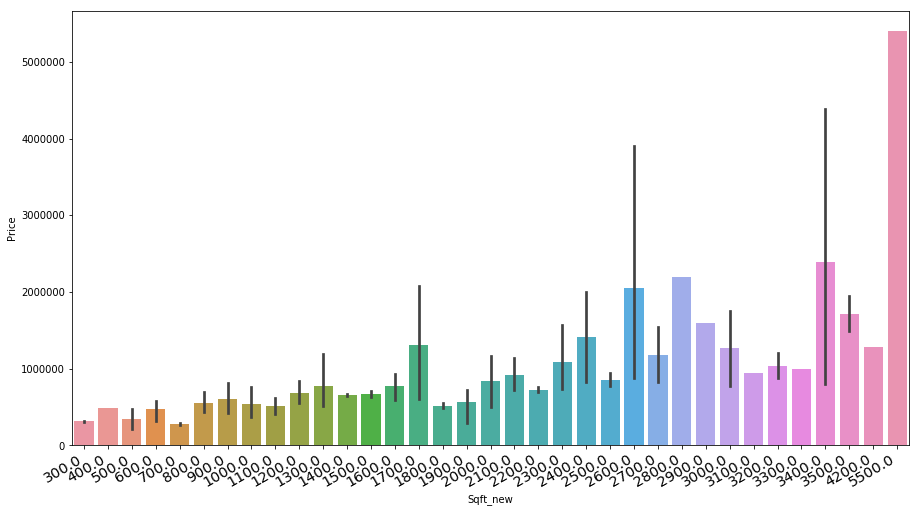

In [321]:
#Barplot between Price and  Updated Sqft values(Sqft_new)
big()
new_sqf = sns.barplot(x='Sqft_new', y='Price', data=data)
new_sqf.set_xticklabels(new_sqf.get_xticklabels(), rotation=30, horizontalalignment='right', fontweight='light',
    fontsize='x-large')

In [ ]:
#Answer 1 : The above plot implies that as the square feet area is increasing, the price of the property is also increasing.
#There are some misimplications in the plot, for example the prices of 1800 sqft properties are very low and again the graph is increasing.
#The reason behind this is, the location of the property also plays a vital role in the price. In this case, the possible reasons for this misconception can be the property is in a different city where the prices are very cheap or the property is in a area where the prices are very low according to the neighbourhood.

# Q2. In the most popular city, does the price range vary based on the squarefeet area and the number of bathrooms in the property ?

In [ ]:
#Please Note: Here the popularity of a city depends on the number of available flats in a particular city.

In [322]:
#The count of properties in each city of the New York state.
data['City'].value_counts()

Brooklyn            38
Staten Island       26
Flushing            15
Bronx               14
New York            14
Jamaica             12
Bayside              3
Rockaway Park        2
Broad Channel        2
Howard Beach         2
Far Rockaway         2
Astoria              1
Saint Albans         1
Rego Park            1
Bellerose Manor      1
Corona               1
Forest Hills         1
Briarwood            1
Glendale             1
Middle Village       1
Woodhaven            1
Queens               1
Long Island City     1
Fresh Meadows        1
Belle Harbor         1
South Ozone Park     1
Yonkers              1
Name: City, dtype: int64

In [ ]:
#The most popular city is Brooklyn as it has the most number of flats available to be sold are there in the complete dataset.

[Text(0, 0, '500.0'),
 Text(0, 0, '600.0'),
 Text(0, 0, '700.0'),
 Text(0, 0, '800.0'),
 Text(0, 0, '900.0'),
 Text(0, 0, '1000.0'),
 Text(0, 0, '1100.0'),
 Text(0, 0, '1200.0'),
 Text(0, 0, '1300.0'),
 Text(0, 0, '1500.0'),
 Text(0, 0, '1600.0'),
 Text(0, 0, '1800.0'),
 Text(0, 0, '2000.0'),
 Text(0, 0, '2100.0'),
 Text(0, 0, '2300.0'),
 Text(0, 0, '2400.0'),
 Text(0, 0, '2600.0'),
 Text(0, 0, '3000.0'),
 Text(0, 0, '3200.0'),
 Text(0, 0, '3400.0')]

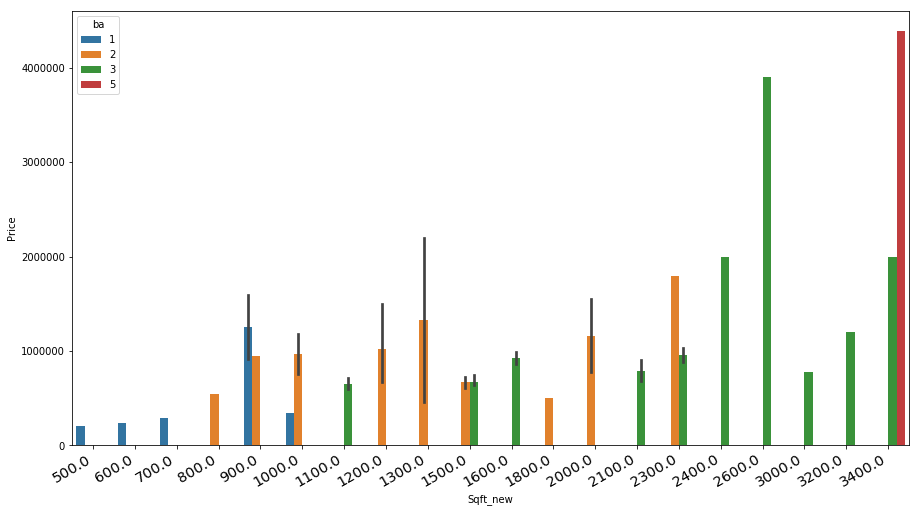

In [327]:
#Barplot between Price and  Updated Sqft values(Sqft_new) in Brooklyn
big()
brk_sqf = sns.barplot(x='Sqft_new', y='Price', data=data[ data['City'] == 'Brooklyn' ], hue='ba')
brk_sqf.set_xticklabels(brk_sqf.get_xticklabels(), rotation=30, horizontalalignment='right', fontweight='light',
    fontsize='x-large')

In [ ]:
#Answer 2 : The plot implies that as the number of bathrooms in a property increases, the prices of the property increases as the square feet area increases with keeping the location of the area in Brooklyn as a key factor.
#The cheapest property available are with 1 bathroom and the area is 500, 600, 700 respectively for price less than $100,000.
#The costliest property available has 5 bathrooms and the area of the property is more than 3500 sqft for price over $4,000,000.

# Q3. Does the average property price of the top 5 popular cities vary?

In [336]:
#Get the top 5 cities in a list which have the most number of properties on sale.
popular = data['City'].value_counts()[:5].index.tolist()
popular

['Brooklyn', 'Staten Island', 'Flushing', 'Bronx', 'New York']

In [427]:
#Creating a new dataframe 
avg_df = pd.DataFrame(columns = ['Top Cities', 'Average Price'])
avg_df['Top Cities'] = popular

In [433]:
#Storing average price values in the new dataframe with respect to their cities
j=0
for i in popular: 
    avg_df['Average Price'][j] = data[data['City'] == i]['Price'].mean()
    j = j + 1

In [434]:
avg_df

,Top Cities,Average Price
0,Brooklyn,1.09583e+06
1,Staten Island,733937
2,Flushing,930198
3,Bronx,647386
4,New York,1.16585e+06


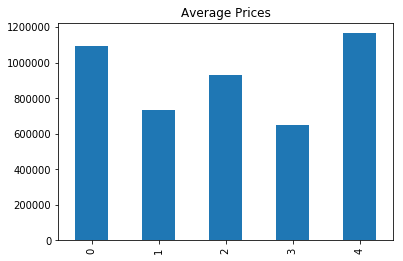

In [454]:
#Basic Bar plot
avg_df.plot(kind = "bar", y = "Average Price", legend = False,
            title = "Average Prices")

In [ ]:
#Answer 3 : All the cities are expensive to live in but New Year won the race of the expensive appartments followed by Brooklyn.
#Only these two cities have average price of appartments over $1,000,000.
#Flushing city has an averge of $900,000.
#Number 4 and number 5 on the rank list cities have a close average that is, $730,000 and $650,000.
#A person trying to move to a new city can choose Bronx city to live in as it is popular and good for a person with a demad of liveble city at a tight property purchasing budget.


# Summary

In [ ]:
#There are many points which can be analysed from the above data analysis of the New York Real Estate analytics:
#1. The pricing of the property depends on the features, location and city it's situated in.
#2. New York is the most expensive city to live in the whole state.
#3. Brooklyn is not only the second most expensive city to live in, but also have many popularity than New York.

# Future Work

In [ ]:
#future work
#When a new property is in the market to be sold, the estimated price can be find using the above analysis and data, based on the features of the property and the location where the property is situated.
#An algorithm can also be build to analyse whether the person who wants to sold the property at a price is valid or if he/she is trying to sold at a higher price than the actual price that the property can be based on the analysis of the surrounding and other similar featured properties.